In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
import matplotlib as mpl
import time
import threading
import ipywidgets as widgets

space_dim = [30,70]

In [2]:
class Enemy(threading.Thread):
    activity_delay = 1
    born_count = 2
    
    def __new__(cls, energy, population):
        if len(np.transpose(np.where(population.space == 0))) == 0: return None
        else: return super().__new__(cls)
    
    def __init__(self, energy, population):
        self.thread = threading.Thread.__init__(self, name=energy)
        self.energy = energy
        aval_space = np.transpose(np.where(population.space == 0))
        self.position = aval_space[np.random.randint(len(aval_space))]
        self.population = population
        #print(self.position)
        population.space[self.position[0], self.position[1]] = energy 
    
    def run(self):
        while (self.energy>0):
            if (self.energy==30): self.population.new_enemy_life_on(20)
            time.sleep(self.activity_delay)
            self.energy -= 1
    
    def action(self):
        return 4
    


In [7]:
class Population:
    def __init__(self, energy, space_dim):
        self.space = np.zeros(shape=space_dim, dtype=int)
        self.enemys = []
        self.aval_space = np.transpose(np.where(self.space == 0))
        self.len_aval_space = len(self.aval_space)
    
    def life(self):
        for i in self.enemys:
            i.start()
            
    def del_enemy(self, enemy):
        self.space[enemy.position[0],enemy.position[1]] = 0
        self.enemys = np.delete(self.enemys, np.where(self.enemys == enemy))
        self.aval_space = np.transpose(np.where(self.space == 0))
        self.len_aval_space = len(self.aval_space)
        print(enemy.position)
        
    def new_enemy(self, energy):
        self.enemys = np.append(self.enemys, Enemy(energy, self))
        self.aval_space = np.transpose(np.where(self.space == 0))
        self.len_aval_space = len(self.aval_space)
       
    def new_enemy_life_on(self, energy):
        self.enemys = np.append(self.enemys, Enemy(energy, self))
      
        self.enemys[len(self.enemys)-1].start()
        self.aval_space = np.transpose(np.where(self.space == 0))
        self.len_aval_space = len(self.aval_space)
        
    def view_space(self):
        #%matplotlib inline
        cmap = mpl.colors.LinearSegmentedColormap.from_list('my_colormap',['white','green','red'], 64)
        plt.text(0,0,str(i))
        plt.figure(figsize=(25, 10))
        plt.imshow(self.space, clim=(0.0, 30.0), cmap=cmap)
        plt.colorbar()
        plt.pause(0.5)
        plt.show()
        clear_output(wait = True)

In [19]:
p1 = Population(1, space_dim)


for n in range(400):
    p1.new_enemy(50)

In [34]:
len(p1.enemys)

407

In [32]:
p1.enemys[0].energy, p1.enemys[1].energy

(0, 0)

In [33]:
p1.enemys[2].energy#, p1.enemys[3].energy

0

In [21]:
p1.life()

In [30]:
threading.active_count()-5, threading.currentThread()

(0, <_MainThread(MainThread, started 548230381584)>)

In [ ]:
len(p1.enemys)

In [ ]:
for f in range(10):
    plt.pause(0.5)
    clear_output(wait = True)
    print(p1.enemys[0].energy, p1.enemys[1].energy, p1.enemys[7].energy, p1.enemys[-1].energy)

In [ ]:
for t in threading.enumerate():
    print(t.name)
    if t.is_alive(): 
        print('Still running') 
    else: 
        print('Completed') 
    if (t.name == '5'): t.stop()


In [ ]:
p1.del_enemy(p1.enemys[1])

In [ ]:
p1.enemys[4].position

In [ ]:
 np.transpose(np.where(p1.space != 0))

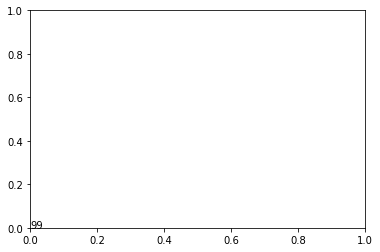

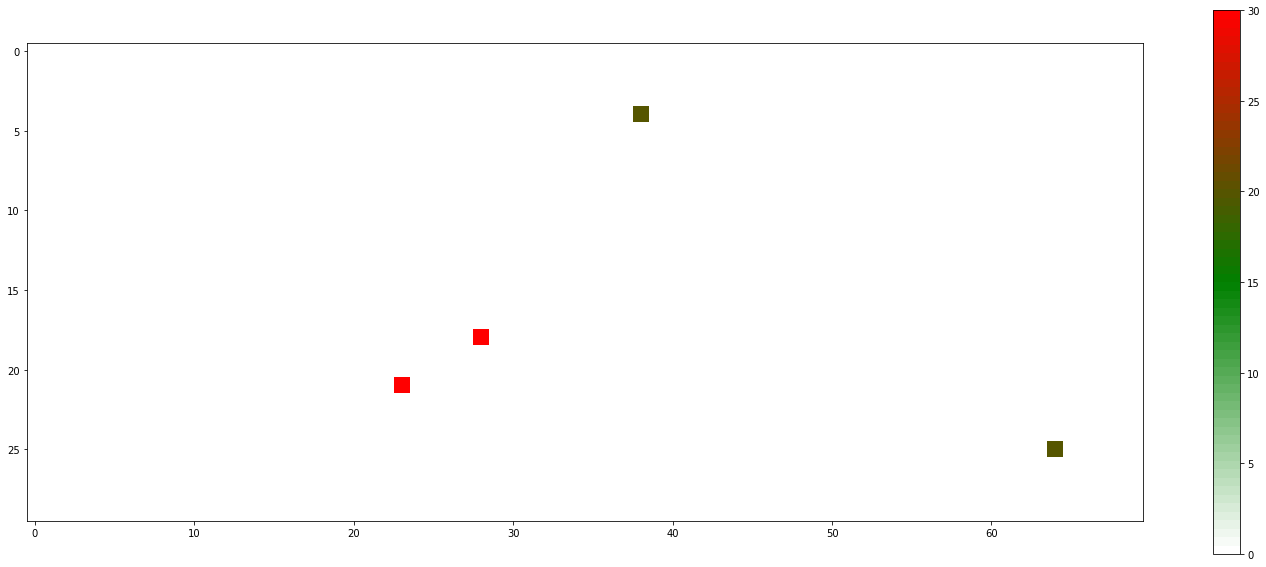

In [80]:
p1.view_space()

In [ ]:
def set_n_Enemy(n):
    for i in range(n):
        enemys = np.append(enemys, Enemy(i, space))

start_time = time.time()
set_n_Enemy(100)       
print("--- %s seconds ---" % (time.time() - start_time))
print(len(enemys))
view_space()

In [ ]:
def append_new_enemy():
    i = len(np.transpose(np.where(space == 0)))
    

In [ ]:
len(np.transpose(np.nonzero(space)))

In [ ]:
len(np.transpose(np.where(space == 0)))